<a href="https://colab.research.google.com/github/JJooKim/detecting_defective_product/blob/main/Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Projects/defective_product_classification

/content/drive/MyDrive/Projects/defective_product_classification


In [4]:
import numpy as np
import pandas as pd

In [5]:
data_path = './'

In [165]:
# Train, Test 불러오기
from sklearn.model_selection import train_test_split
df_train = pd.read_csv(data_path + 'train.csv', encoding='utf-8')
df_test = pd.read_csv(data_path + 'test.csv', encoding='utf-8')
X_train = df_train.drop(columns=['label'])
y_train = df_train['label']
X_test = df_test.drop(columns=['label'])
y_test = df_test['label']

In [166]:
# Preprocessing

import random
from datetime import datetime
import calendar
from sklearn.preprocessing import LabelEncoder
# wtcd  Null 값 처리를 위한 확률 딕셔너리
unique_values = X_train['wtcd'].unique()
probabilities = {value: (X_train['wtcd'] == value).sum() / len(X_train['wtcd']) for value in unique_values}
probabilities = {key: value / sum(probabilities.values()) for key, value in probabilities.items()}
def preprocessing(data):
  # 새로운 칼럼 만들기


  data['region'] = data['Num'].str[8:-7]
  region_mapping = {
    '산천': 'Sanchun',
    '창하': 'Changha',
    '수성': 'Susung',
    '오포': 'Opo',
  }
  data['region'] = data['region'].map(region_mapping)

  data['Num'] = data['Num'].str[-1]

  data['days_between'] = (pd.to_datetime(data['buydate']) - pd.to_datetime(data['date'])).dt.days

  data['ingr_A_R'] = (data['ingr_A'] / data['gram'])
  data['ingr_B_R'] = (data['ingr_B'] / data['gram'] )
  data['ingr_C_R'] = (data['ingr_C'] / data['gram'])


  # `wtcd` Null 값 처리
  data['wtcd'] = data.apply(lambda row: random.choices(list(probabilities.keys()), weights=list(probabilities.values()))[0] if pd.isnull(row['wtcd']) else row['wtcd'], axis=1)

  # `ingr_B` 이상치 처리
  data['ingr_B'] = data['ingr_B'].apply(lambda x: x / 10000 if x >= 10 else x)


  # 불필요한 feature 제거
  data = data.drop(columns = ['date', 'buydate',  'index'])

  # 범주형 데이터 원핫 인코딩
  columns_to_encode = ['Num', 'region', 'prod', 'insp', 'wtcd']
  data = pd.get_dummies(data, columns=columns_to_encode)

  return data



In [167]:
X_train = preprocessing(X_train)
X_train

,ingr_A,ingr_B,ingr_C,gram,days_between,ingr_A_R,ingr_B_R,ingr_C_R,Num_A,Num_B,Num_C,region_Changha,region_Opo,region_Sanchun,region_Susung,prod_GBMD,prod_GGMD,prod_JJBB,prod_KCMD,insp_C,insp_K,insp_L,insp_P,insp_Y,wtcd_F1,wtcd_F2,wtcd_F3
0,399.4063,6.4035,6.9409,970.32,92,0.411623,0.006599,0.007153,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
1,130.0951,5.8245,6.2857,2490.08,51,0.052245,0.002339,0.002524,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,131.5192,5.8040,6.0607,487.37,58,0.269855,0.011909,0.012436,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
3,128.5978,6.8720,6.1705,707.94,30,0.181651,0.009707,0.008716,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
4,320.6915,5.7474,6.3695,1978.66,5,0.162075,0.002905,0.003219,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,405.6626,6.2900,6.8467,777.82,18,0.521538,0.008087,0.008802,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
9996,129.1664,6.0345,6.5257,2548.73,10,0.050679,0.002368,0.002560,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
9997,403.9895,6.2698,6.7227,2769.71,88,0.145860,0.002264,0.002427,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
9998,309.4751,5.7987,6.5499,2005.46,11,0.154316,0.002891,0.003266,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1


In [168]:
X_test = preprocessing(X_test)
X_test

,ingr_A,ingr_B,ingr_C,gram,days_between,ingr_A_R,ingr_B_R,ingr_C_R,Num_A,Num_B,Num_C,region_Changha,region_Opo,region_Sanchun,region_Susung,prod_GBMD,prod_GGMD,prod_JJBB,prod_KCMD,insp_C,insp_K,insp_L,insp_P,insp_Y,wtcd_F1,wtcd_F2,wtcd_F3
0,400.0039,6.4270,6.6832,793.14,42,0.504330,0.008103,0.008426,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1,130.8366,6.9564,6.2847,515.14,65,0.253983,0.013504,0.012200,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
2,327.4969,7.2336,5.9245,2035.66,36,0.160880,0.003553,0.002910,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
3,394.2496,6.3044,6.8083,772.78,24,0.510171,0.008158,0.008810,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
4,319.6806,5.8364,5.9225,977.31,12,0.327103,0.005972,0.006060,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,324.2386,7.3920,5.9031,678.66,83,0.477763,0.010892,0.008698,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
39996,130.0161,6.3554,6.1290,489.44,12,0.265643,0.012985,0.012522,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
39997,130.4973,7.1619,5.9173,2551.65,14,0.051142,0.002807,0.002319,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
39998,131.5529,5.8700,6.2282,524.21,2,0.250955,0.011198,0.011881,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [169]:
# 정규화

import pandas as pd
from sklearn.preprocessing import MinMaxScaler


columns_to_normalize = ['ingr_A', 'ingr_B', 'ingr_C', 'gram', 'days_between']


scaler = MinMaxScaler()


X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])

X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])


In [170]:
# Score Metric 함수

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

def metric(model, X_train, X_test, y_train, y_test):

  y_pred_proba = model.predict_proba(X_test)[:, 1]

  #Calculate AUC Score
  auc_score = roc_auc_score(y_test, y_pred_proba)


  # Draw Graph
  score1 = model.predict_proba(X_test)[:, 1]
  score2 = model.predict_proba(X_train)[:, 1]
  fpr1, tpr1, cut1 = roc_curve(y_test, score1)
  fpr2, tpr2, cut2 = roc_curve(y_train, score2)

  plt.plot(fpr1, tpr1, label="Test")
  plt.plot(fpr2, tpr2, label="Train")
  plt.plot([0, 1], [0, 1], color="red")
  plt.legend()
  plt.show()

  print(f"AUC Score: {round(auc_score, 4)}")


  #Get Threshold
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  distances_to_top_left = np.sqrt(fpr**2 + (1 - tpr)**2)
  best_threshold_index_alt = np.argmin(distances_to_top_left)
  best_threshold_alt = thresholds[best_threshold_index_alt]

  print("Best Threshold", round(best_threshold_alt, 4))

  # Recall Score with Custom Threshold
  custom_threshold = round(best_threshold_alt, 2)
  y_pred_custom_threshold = (model.predict_proba(X_test)[:, 1] > custom_threshold).astype(int)
  recall_custom_threshold = recall_score(y_test, y_pred_custom_threshold)
  print("Recall Score with Custom Threshold:", round(recall_custom_threshold, 4))

  # Accuracy Score with Custom Threshold
  accuracy_custom_threshold = accuracy_score(y_test, y_pred_custom_threshold)
  print("Accuracy Score with Custom Threshold:", round(accuracy_custom_threshold, 4))

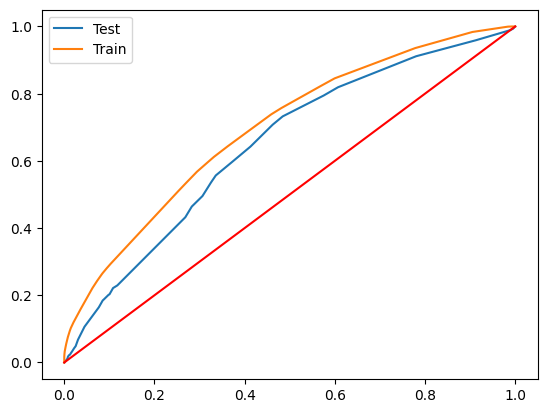

AUC Score: 0.6472
Best Threshold 0.2185
Recall Score with Custom Threshold: 0.5964
Accuracy Score with Custom Threshold: 0.6212


In [171]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
decision_clf = DecisionTreeClassifier(random_state=123, max_depth=6)
decision_clf.fit(X_train, y_train)
metric(decision_clf, X_train, X_test, y_train, y_test)

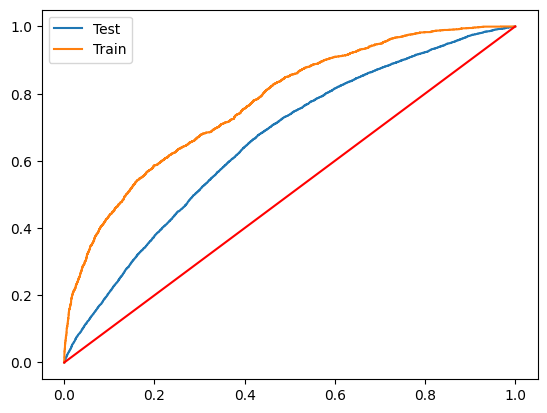

AUC Score: 0.6585
Best Threshold 0.2264
Recall Score with Custom Threshold: 0.6496
Accuracy Score with Custom Threshold: 0.6053


In [163]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf_500 = RandomForestClassifier(n_estimators=500, random_state=123, max_depth=8, min_samples_leaf=10, min_samples_split= 10)
rf_clf_500.fit(X_train, y_train)
metric(rf_clf_500, X_train, X_test, y_train, y_test)

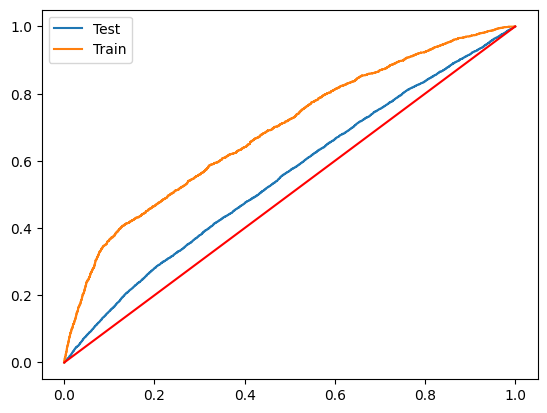

AUC Score: 0.5537
Best Threshold 0.2193
Recall Score with Custom Threshold: 0.1477
Accuracy Score with Custom Threshold: 0.7379


In [172]:
# Support Vector Machine Classifier
from sklearn import svm

svm = svm.SVC(kernel='rbf', random_state=123, probability = True)
svm.fit(X_train, y_train)
metric(svm, X_train, X_test, y_train, y_test)

Iteration 1, loss = 0.84682479
Iteration 2, loss = 0.59009903
Iteration 3, loss = 0.53918482
Iteration 4, loss = 0.53173584
Iteration 5, loss = 0.52727389
Iteration 6, loss = 0.52392835
Iteration 7, loss = 0.52140164
Iteration 8, loss = 0.51924025
Iteration 9, loss = 0.51715359
Iteration 10, loss = 0.51531865
Iteration 11, loss = 0.51366388
Iteration 12, loss = 0.51176953
Iteration 13, loss = 0.51042885
Iteration 14, loss = 0.50906621
Iteration 15, loss = 0.50796450
Iteration 16, loss = 0.50678331
Iteration 17, loss = 0.50600090
Iteration 18, loss = 0.50548075
Iteration 19, loss = 0.50460099
Iteration 20, loss = 0.50441974
Iteration 21, loss = 0.50437908
Iteration 22, loss = 0.50305605
Iteration 23, loss = 0.50318829
Iteration 24, loss = 0.50303122
Iteration 25, loss = 0.50238089
Iteration 26, loss = 0.50209356
Iteration 27, loss = 0.50201747
Iteration 28, loss = 0.50174822
Iteration 29, loss = 0.50160742
Iteration 30, loss = 0.50147735
Iteration 31, loss = 0.50161608
Iteration 32, los

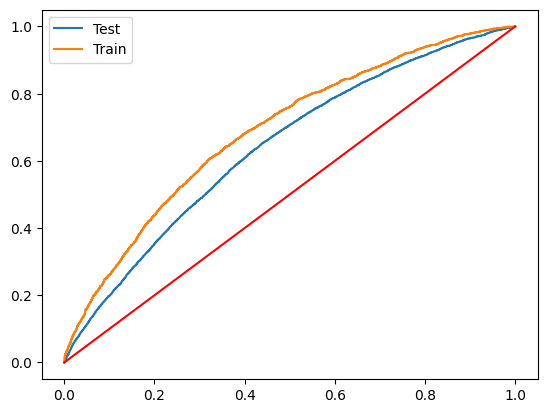

AUC Score: 0.6402
Best Threshold 0.2224
Recall Score with Custom Threshold: 0.6264
Accuracy Score with Custom Threshold: 0.594


In [173]:
# MultiLayerPerceptron Classifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='relu', solver="adam", alpha=1e-6,
                    hidden_layer_sizes=(16, 8, 4),  random_state=1, max_iter=500, verbose=True,
                    learning_rate='adaptive')
mlp.fit(X_train, y_train)
metric(mlp, X_train, X_test, y_train, y_test)

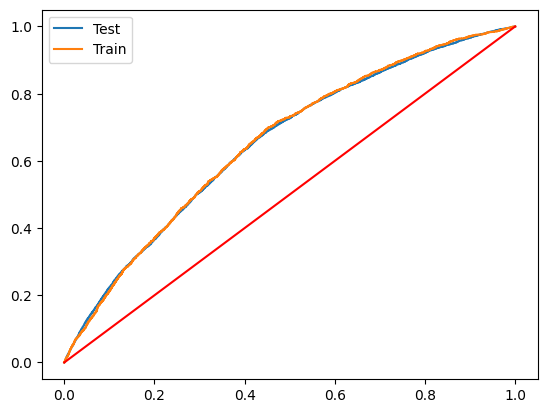

AUC Score: 0.6534
Best Threshold 0.2185
Recall Score with Custom Threshold: 0.6471
Accuracy Score with Custom Threshold: 0.5998


In [179]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(C=1, penalty='l1', solver='liblinear')
lr_clf.fit(X_train, y_train)
metric(lr_clf, X_train, X_test, y_train, y_test)

In [177]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification



logistic_regression = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 9),
    'solver': ['liblinear']
}


grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_



Test Accuracy: 0.7805


In [178]:
best_params

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}